In [8]:
from concurrent.futures import ThreadPoolExecutor

import geopandas as gpd
import numpy as np
import odc.geo
from odc.stac import load
from pystac_client import Client
from shapely import geometry
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import sys, os
sys.path.insert(1, os.path.abspath('../Tools'))
    
import rasterio
import matplotlib
import pickle
import joblib
from utils import predict_xr, load_data

In [9]:
bareland_2019 = xr.open_dataset("Test_change_detection/bareland_2019.tif")
quarry_2019 = xr.open_dataset("Test_change_detection/quarry_2019.tif")
bareland_2020 = xr.open_dataset("Test_change_detection/bareland_2020.tif")
quarry_2020 = xr.open_dataset("Test_change_detection/quarry_2020.tif")

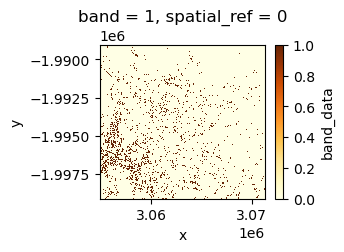

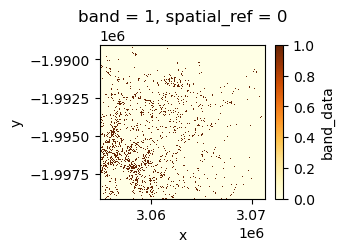

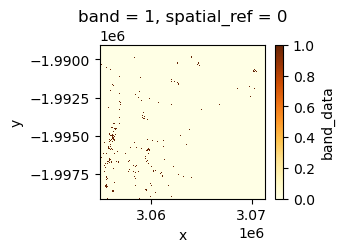

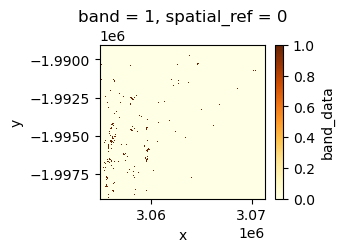

In [10]:
bareland_2019.band_data.plot(cmap="YlOrBr", size=2)
bareland_2020.band_data.plot(cmap="YlOrBr", size=2)
quarry_2019.band_data.plot(cmap="YlOrBr", size=2)
quarry_2020.band_data.plot(cmap="YlOrBr", size=2)

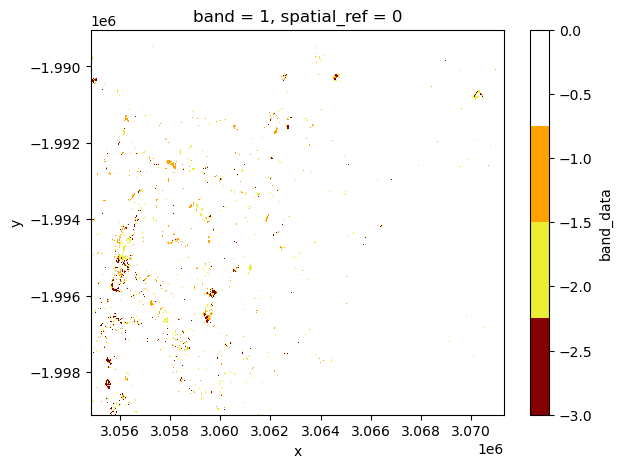

In [11]:
from matplotlib import colors

cd_classes = [
    [-3, "Quarry 1-1", "#850000", "maroon"],
    [-2, "Quarry 1-0", "#eaed34", "yellow"],
    [-1, "Quarry 0-1", "#ffa200", "orange"],
    [0, "Quarry 0-0", "#00000000", "transparent"]
]

values_list = [c[0] for c in cd_classes]
cd_color_list = [c[2] for c in cd_classes]

cd_color_list = [cd[2] for cd in cd_classes]
bounds = values_list + [5]
cd_map = colors.ListedColormap(cd_color_list)
norm = colors.BoundaryNorm(bounds, cd_map.N)

change_quarry_2019_2020 = quarry_2019*-2 - quarry_2020
change_quarry_2019_2020.band_data.plot(cmap=cd_map, size=5)

In [12]:
change_quarry_2019_2020.band_data.odc.write_cog("Test_change_detection/change_quarry_2019_2020.tif", overwrite=True)

PosixPath('Test_change_detection/change_quarry_2019_2020.tif')

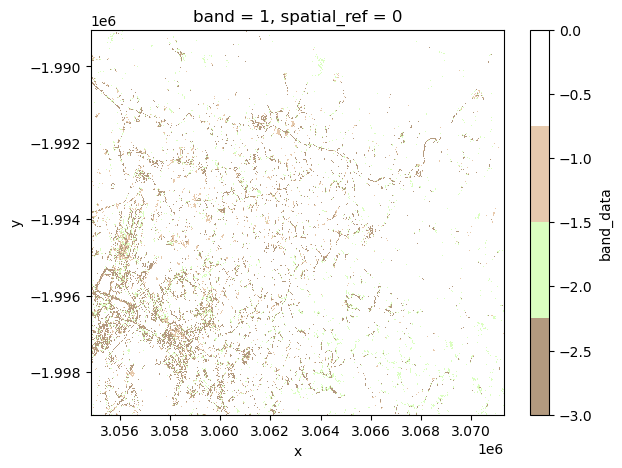

In [13]:
from matplotlib import colors

cd_classes = [
    [-3, "Bare land 1-1", "#69360080", "dark brown"],
    [-2, "Bare land 1-0", "#b8ff8280", "green"],
    [-1, "Bare land 0-1", "#d1975c80", "light brown"],
    [0, "Bare land 0-0", "#00000000", "transparent"]
]

values_list = [c[0] for c in cd_classes]
cd_color_list = [c[2] for c in cd_classes]

cd_color_list = [cd[2] for cd in cd_classes]
bounds = values_list + [5]
cd_map = colors.ListedColormap(cd_color_list)
norm = colors.BoundaryNorm(bounds, cd_map.N)

change_bareland_2019_2020 = bareland_2019*-2 - bareland_2020
change_bareland_2019_2020.band_data.plot(cmap=cd_map, size=5)

In [14]:
change_bareland_2019_2020.band_data.odc.write_cog("Test_change_detection/change_bareland_2019_2020.tif", overwrite=True)

PosixPath('Test_change_detection/change_bareland_2019_2020.tif')